In [1]:
using RD

In [2]:
function build_model_state(L)
    g,posx,posy = RD.gen_hex_lattice(L)
    N = length(posx)
    unit_length = 1.0
    theta = 0.2126944621086619#Stot/V
    Ac = unit_length^2#area associated to each cell, set unit lengthscale
    Stot = N*Ac #area of each cell is assumed to be 1, setting unit lengthscale
    V = Stot/theta
    d_timescale = 1.0#this sets unit timescale
    dA, dB, dEA, dEB = (d_timescale for _ in 1:4)
    #rates in the theory (do not correspond excatly to those used in the simulations), some slight dimensional changes are needed
    kAa_th = 1.0
    kAd_th = 1.0*kAa_th
    kAc_th = 1.0
    kBa_th = 1.0
    kBd_th = 1.0*kBa_th
    kBc_th = logrange(logrange(0.1,10,17)[4],logrange(0.1,10.0,17)[14],23)[13]*kAc_th
    KMM_th = 1.0
    #rates to implement
    kAc = kAc_th
    kBc = kBc_th
    kAa = kAa_th/V
    kAd = kAd_th
    kBa = kBa_th/V
    kBd = kBd_th
    KMM = KMM_th*Ac

    M = Model(g, posx, posy, dA, dB, dEA, dEB, kAc, kBc, kAa, kAd, kBa, kBd, KMM, 0.0)

    N = length(M)
    totmol = N * 10
    totA = 0.5 * totmol
    totB = 0.5 * totmol
    theta = 0.2126944621086619#Stot/V

    nA, nB, nEA, nEB = (fill(0,N) for _ in 1:4)

    for i in 1:totA
        nA[rand(1:N)] += 1
    end
    for i in 1:totB
        nB[rand(1:N)] += 1	
    end
    EA_tot_n = floor(Int, 0.1*N)
    EB_tot_n = floor(Int, 0.1*N)
    EA_mem = floor(Int, EA_tot_n*(theta/(kAd_th/kAa_th))*(totA/Stot)/(1+((theta/(kAd_th/kAa_th))*(totA/Stot))))
    EB_mem = floor(Int, EB_tot_n*(theta/(kBd_th/kBa_th))*(totB/Stot)/(1+((theta/(kBd_th/kBa_th))*(totB/Stot))))
    for i in 1:EA_mem
        nEA[rand(1:N)] += 1
    end
    for i in 1:EB_mem
        nEB[rand(1:N)] += 1
    end
    cytoEA = EA_tot_n - EA_mem
    cytoEB = EB_tot_n - EB_mem

    s = State(nA, nB, nEA, nEB, Ref(cytoEA), Ref(cytoEB))
    M,s
end

build_model_state (generic function with 1 method)

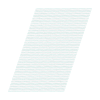

In [3]:
using GraphPlot

T = 20000.0
L = 50

M,s = build_model_state(L)
gplot(M.g, M.posx, M.posy)


In [ ]:
p = ProgressMeasurer(T)
m = Measurer(M; times=0.0:1000:T)
stats = (t,s)->(p(t,s); m(t,s))

run_RD!(s, M, T; stats = m)

starting simulation, 25000 events in the queue
T = 0.0 and <ϕ>/c = 0.46656
Binder cumulant: 0.08846672329586014


Progress:   5%|██                                       |  ETA: 0:05:22

T = 1000.0 and <ϕ>/c = 0.43736
Binder cumulant: 0.1406978397992128


Progress:  10%|████▏                                    |  ETA: 0:05:02

T = 2000.0 and <ϕ>/c = 0.45288
Binder cumulant: 0.093403137641631


Progress:  15%|██████▏                                  |  ETA: 0:04:45

T = 3000.0 and <ϕ>/c = 0.42888
Binder cumulant: 0.15521907293188575


Progress:  20%|████████▎                                |  ETA: 0:04:28

T = 4000.0 and <ϕ>/c = 0.44376
Binder cumulant: 0.12502958875111292


Progress:  25%|██████████▎                              |  ETA: 0:04:10

T = 5000.0 and <ϕ>/c = 0.48096
Binder cumulant: 0.037120651670290106


Progress:  30%|████████████▎                            |  ETA: 0:03:54

T = 6000.0 and <ϕ>/c = 0.44608
Binder cumulant: 0.08393676700787778


Progress:  31%|████████████▊                            |  ETA: 0:03:51

InterruptException: InterruptException:

In [19]:
include("../src/RDold.jl")
include("../src/run_tests.jl")

0.2126944621086619


estimated rho0 =1.1397725198066269
estimated rho+ =3.1269446210866194
estimated rho- =0.3198009946375379
estimated k =0.1
bistability region between 0.09090909090909091 and 2.0
physical region between 0.36450038549469216 and 3.5640055500716743
estimatted phi_eq/c= 0.12674377776054654
now run reaction diffusion
T=0.0 and <phi>/c=0.0
Binder cumulant: -0.052247473099695796
T=10.0 and <phi>/c=0.00696
Binder cumulant: -0.03992643697076925
T=20.0 and <phi>/c=0.01792
Binder cumulant: -0.03108421500120806
T=30.0 and <phi>/c=0.02216
Binder cumulant: -0.014558449344613145
T=40.0 and <phi>/c=0.03544
Binder cumulant: -0.017768544999159808
T=50.0 and <phi>/c=0.05096
Binder cumulant: 0.002373934076744688
T=60.0 and <phi>/c=0.0612
Binder cumulant: -0.004122973348759107
T=70.0 and <phi>/c=0.07688
Binder cumulant: 0.018986828581408655
T=80.0 and <phi>/c=0.08568
Binder cumulant: -0.020695207843581365
T=90.0 and <phi>/c=0.10272
Binder cumulant: 0.058343365234734934
T=100.0 and <phi>/c=0.11216
Binder cumu

LoadError: LoadError: InterruptException:
in expression starting at /home/ab/src/RD.jl/src/run_tests.jl:105